# Experimental Studies

If our algorithm has already been implemented, we can study its time complexity by running it on a range of test inputs and reporting the time spent during each execution.

We can do this in Python by using the time function of the time module.

Specically, we do this by recording the time just before the algorithm starts and the time just after the algorithm ends, and then computing their difference, as follows:

In [1]:
from time import time
import random
import matplotlib.pyplot as plt

plt.style.use('dark_background')

## Algorithm: Linear Scan

In [2]:
def scan_values(key, values):
    """Return true if key is in values, else return false"""
    for value in values:
        if value == key:
            return True
    return False

### Data generation

In [3]:
def gen_data(n):
    """Return a key and a random list of n numbers."""
    numbers = list(range(n))
    random.shuffle(numbers)
    key = random.randrange(n + n//4)
    return key, numbers

## Visualisation

We are interested in the running time based on the *size* of the input.

We should perform independent experiments on many different test inputs of various sizes.

This allows us to visualise the results by plotting each run of the algorithm as a point with the x-coordinate equal to the input size, n, and y-coordinate equal to the running time.

In [4]:
# setup parameters
num_tests = 1000
min_n, max_n = 100, 10000
test_n = [random.randint(min_n, max_n) for _ in range(num_tests)]
test_t = []
random.seed(42)

# run experiment
for n in test_n:
    key, values = gen_data(n)
    
    # time it
    start = time()
    scan_values(key, values)
    end = time()

    # result, milliseconds
    t = (end-start) * 1000
    test_t.append(t)

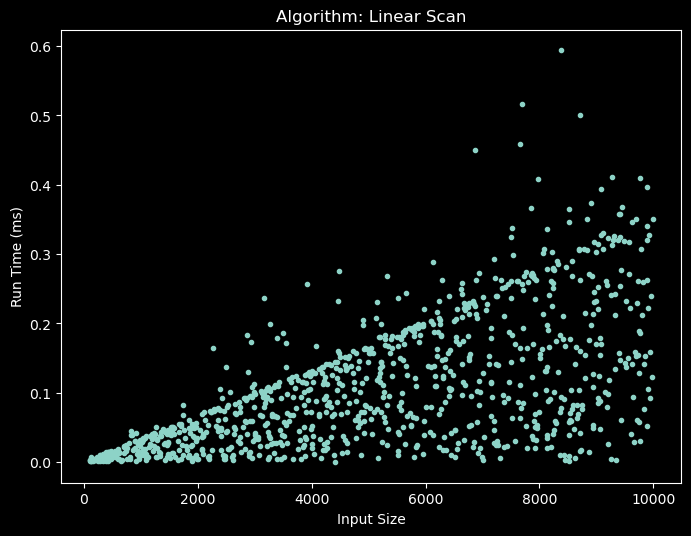

In [5]:
fig, ax = plt.subplots(figsize=[8, 6], dpi=100)
ax.plot(test_n, test_t, ".")
ax.set_title("Algorithm: Linear Scan")
ax.set_ylabel("Run Time (ms)")
ax.set_xlabel("Input Size");
fig.savefig("lin_scan_experiment.png", dpi=120, bbox_inches="tight")